In [64]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random 
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report

In [65]:
train  = pd.read_csv('datasets/fashion-mnist_train.csv')
test = pd.read_csv('datasets/fashion-mnist_test.csv')

In [66]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# Assuming the first column is 'label' and the rest are pixel values
train_x = train.drop(columns='label').values
train_y = train['label'].values
test_x = test.drop(columns='label').values
test_y = test['label'].values

# Reshape the data to (num_samples, 28, 28, 1) assuming each image is 28x28
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

In [68]:
train_x, test_x = train_x/255, test_x/255

In [69]:
train_y_cat = to_categorical(train_y,10)
test_y_cat = to_categorical(test_y,10)

In [70]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])
        

/home/kalpesh/projects/lp5/dl/jupyter_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.fit(train_x,train_y_cat,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7287 - loss: 0.7466 - val_accuracy: 0.8572 - val_loss: 0.4027
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8697 - loss: 0.3644 - val_accuracy: 0.8658 - val_loss: 0.3646
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8874 - loss: 0.3092 - val_accuracy: 0.8874 - val_loss: 0.3131
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8983 - loss: 0.2832 - val_accuracy: 0.8972 - val_loss: 0.2850
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9048 - loss: 0.2529 - val_accuracy: 0.8942 - val_loss: 0.2880
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9170 - loss: 0.2244 - val_accuracy: 0.8999 - val_loss: 0.2751
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9222 - loss: 0.2075 - val_accuracy: 0.9095 - val_loss: 0.2554
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9332 - loss: 0.1853 - val_accur

In [73]:
test_loss,test_acc= model.evaluate(test_x,test_y_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9138 - loss: 0.2426


In [74]:
test_acc*100

91.76999926567078

In [75]:
test_loss

0.2344638854265213

In [76]:
pred_y = model.predict(test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [77]:
pred_y[5]

array([1.7464453e-01, 1.7687926e-06, 2.2742485e-01, 2.6431817e-03,
       2.0685003e-04, 1.7154218e-05, 5.9446251e-01, 8.4231812e-07,
       5.9357728e-04, 4.8150105e-06], dtype=float32)

In [78]:
pred_labels = np.argmax(pred_y, axis=1)

In [79]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [80]:
pred_label_names = [label_names[label] for label in pred_labels]

In [81]:
print("\nClassification report:")
print(classification_report(test_y,pred_labels))


Classification report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.90      0.85      0.87      1000
           3       0.92      0.93      0.93      1000
           4       0.87      0.89      0.88      1000
           5       0.99      0.97      0.98      1000
           6       0.76      0.77      0.77      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [82]:
random_indices = random.sample(range(len(test_x)), 5)

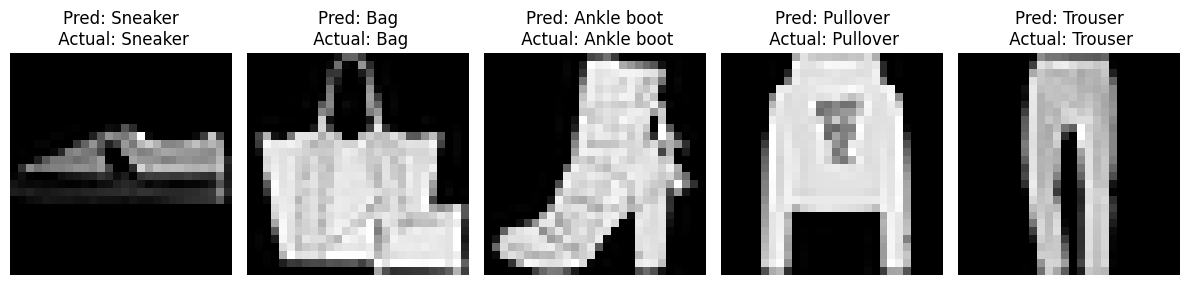

In [84]:
plt.figure(figsize=(12,8))
for i,idx in enumerate(random_indices):
    plt.subplot(1,5,i+1)
    plt.imshow(test_x[idx].reshape(28,28),  cmap='gray')
    plt.title(f"Pred: {pred_label_names[idx]}\n Actual: {label_names[test_y[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
    